In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('Datasets/ACI-IoT-2023.csv')

In [4]:
print(df.columns)

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [5]:
initial_columns_to_drop = [
    "Flow ID",
    "Src IP",
    "Dst IP",
    "Timestamp",
    "Fwd Header Length",
    "Bwd Header Length",
    "Fwd Packets/s",
    "Bwd Packets/s",
    "Subflow Fwd Packets",
    "Subflow Fwd Bytes",
    "Subflow Bwd Packets",
    "Subflow Bwd Bytes",
    "Fwd PSH Flags",
    "Bwd PSH Flags",
    "Fwd URG Flags",
    "Bwd URG Flags",
]

In [6]:
df=df.drop(columns=initial_columns_to_drop, errors='ignore')

In [8]:
print("Column data types after initial drop:")
for idx, col in enumerate(df.columns, start=1):
    print(f"{idx}- {col}: {df[col].dtype}")

Column data types after initial drop:
1- Src Port: int64
2- Dst Port: int64
3- Protocol: int64
4- Flow Duration: int64
5- Total Fwd Packet: int64
6- Total Bwd packets: int64
7- Total Length of Fwd Packet: float64
8- Total Length of Bwd Packet: float64
9- Fwd Packet Length Max: float64
10- Fwd Packet Length Min: float64
11- Fwd Packet Length Mean: float64
12- Fwd Packet Length Std: float64
13- Bwd Packet Length Max: float64
14- Bwd Packet Length Min: float64
15- Bwd Packet Length Mean: float64
16- Bwd Packet Length Std: float64
17- Flow Bytes/s: float64
18- Flow Packets/s: float64
19- Flow IAT Mean: float64
20- Flow IAT Std: float64
21- Flow IAT Max: float64
22- Flow IAT Min: float64
23- Fwd IAT Total: float64
24- Fwd IAT Mean: float64
25- Fwd IAT Std: float64
26- Fwd IAT Max: float64
27- Fwd IAT Min: float64
28- Bwd IAT Total: float64
29- Bwd IAT Mean: float64
30- Bwd IAT Std: float64
31- Bwd IAT Max: float64
32- Bwd IAT Min: float64
33- Packet Length Min: float64
34- Packet Length Max

In [ ]:
import numpy as np

# Compute correlation matrix (ignoring the Label column if present)
correlation_matrix = df.drop(columns=["Label"], errors="ignore").corr()

# Define a correlation threshold and extract the upper triangle of the correlation matrix
correlation_threshold = 0.9
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Identify columns with any correlation greater than the threshold
columns_to_drop_corr = [
    col
    for col in upper_triangle.columns
    if any(upper_triangle[col] > correlation_threshold)
]



# Drop the highly correlated columns
data = df.drop(columns=columns_to_drop_corr, errors="ignore")

print(f"Columns dropped due to high correlation: {columns_to_drop_corr}")
print("Updated dataset shape:", data.shape)


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 85 features initially
# Load your dataset if not already loaded

data=pd.read_csv('Datasets/ACI-IoT-2023.csv')

Features after initial drop: 69
Numeric features before handling NaN: 67
Numeric features after handling NaN: 67
Correlation matrix shape: (67, 67)


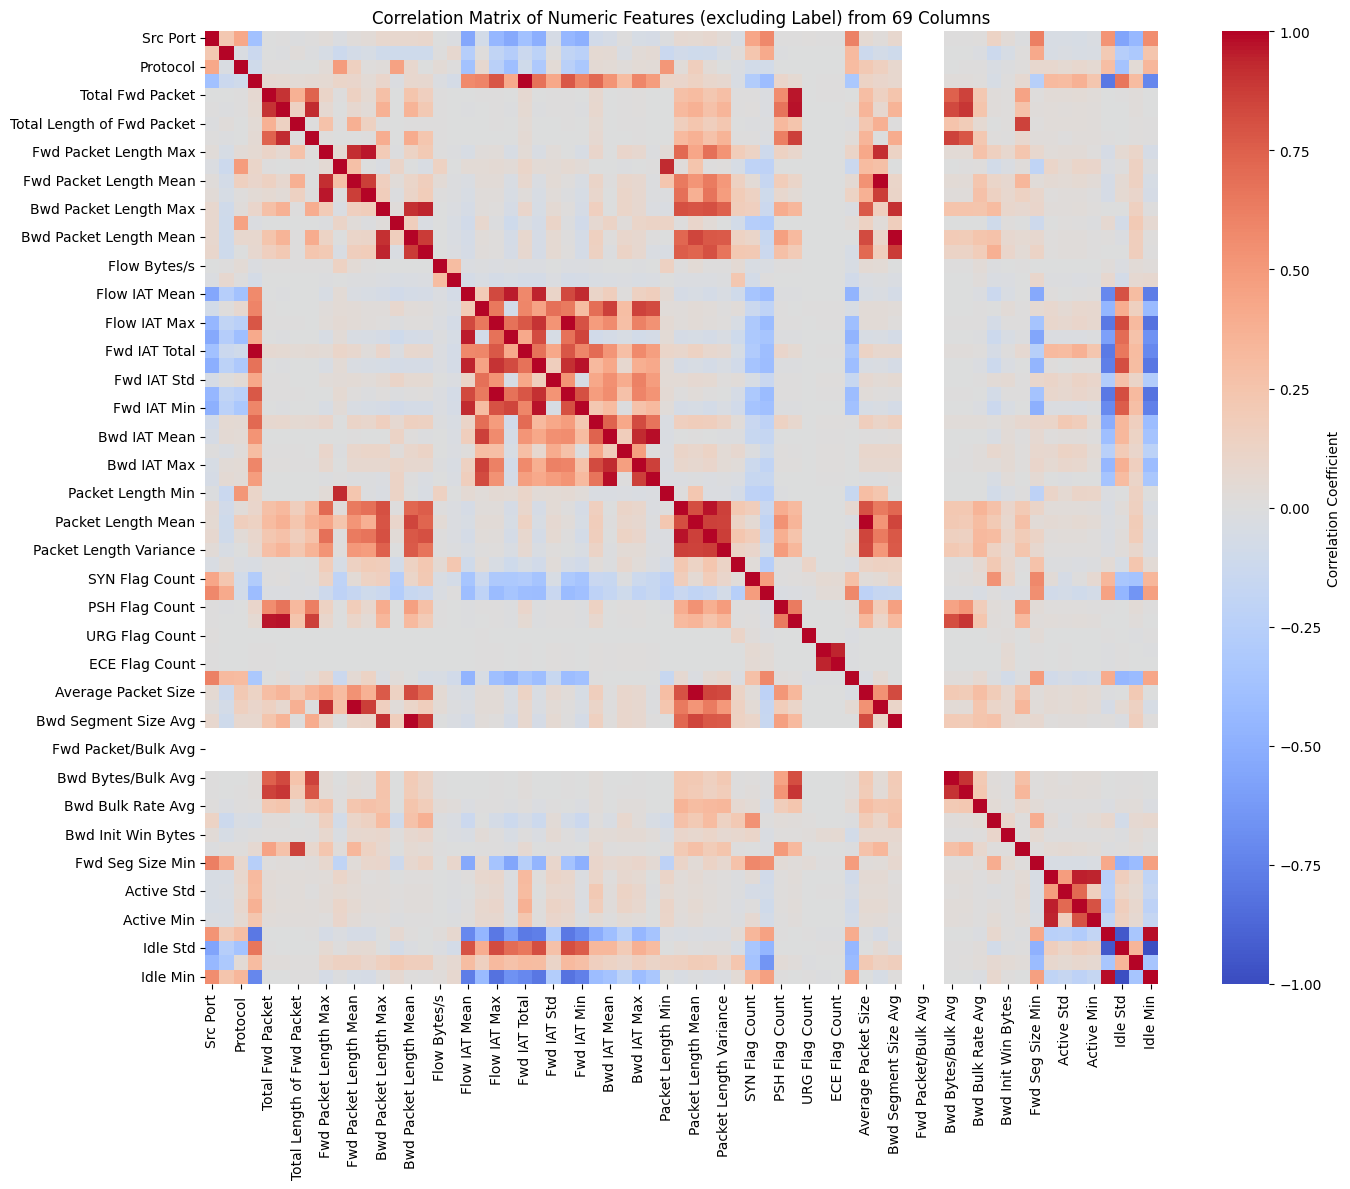

High correlation (0.997) between Flow Duration and Fwd IAT Total
High correlation (0.906) between Total Fwd Packet and Total Bwd packets
High correlation (0.964) between Total Fwd Packet and ACK Flag Count
High correlation (0.855) between Total Fwd Packet and Bwd Packet/Bulk Avg
High correlation (0.924) between Total Bwd packets and Total Length of Bwd Packet
High correlation (0.976) between Total Bwd packets and ACK Flag Count
High correlation (0.896) between Total Bwd packets and Bwd Packet/Bulk Avg
High correlation (0.859) between Total Length of Fwd Packet and Fwd Act Data Pkts
High correlation (0.865) between Total Length of Bwd Packet and ACK Flag Count
High correlation (0.856) between Total Length of Bwd Packet and Bwd Bytes/Bulk Avg
High correlation (0.915) between Fwd Packet Length Max and Fwd Packet Length Mean
High correlation (0.968) between Fwd Packet Length Max and Fwd Packet Length Std
High correlation (0.915) between Fwd Packet Length Max and Fwd Segment Size Avg
High c

In [18]:

# Step 1: Define and drop the 16 not-needed columns
initial_columns_to_drop = [
    "Flow ID",
    "Src IP",
    "Dst IP",
    "Timestamp",
    "Fwd Header Length",
    "Bwd Header Length",
    "Fwd Packets/s",
    "Bwd Packets/s",
    "Subflow Fwd Packets",
    "Subflow Fwd Bytes",
    "Subflow Bwd Packets",
    "Subflow Bwd Bytes",
    "Fwd PSH Flags",
    "Bwd PSH Flags",
    "Fwd URG Flags",
    "Bwd URG Flags",
]
data = data.drop(columns=initial_columns_to_drop, errors="ignore")
print(f"Features after initial drop: {len(data.columns)}")  # Should be 69

# Step 2: Identify and select only numeric columns, handle missing values
numeric_data = data.select_dtypes(include=[np.number]).drop(
    columns=["Label"], errors="ignore"
)
print(
    f"Numeric features before handling NaN: {len(numeric_data.columns)}"
)  # Should be 67

# Fill or drop NaN values to ensure a complete correlation matrix
numeric_data = numeric_data.fillna(
    numeric_data.mean()
)  # Fill NaN with column mean (or use dropna() if preferred)
print(f"Numeric features after handling NaN: {len(numeric_data.columns)}")

# Compute correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Verify the shape of the correlation matrix
print(f"Correlation matrix shape: {correlation_matrix.shape}")  # Should be (67, 67)

# Visualize the correlation matrix as a heatmap with adjusted size
plt.figure(figsize=(15, 12))  # Increase figure size to accommodate 67x67
heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    cbar_kws={"label": "Correlation Coefficient"},
)
plt.title("Correlation Matrix of Numeric Features (excluding Label) from 69 Columns")
plt.tight_layout()

# Save the plot as an image for Fig. 2
plt.savefig(
    "correlation_matrix_69_numeric_features.png", dpi=300, bbox_inches="tight"
)  # Higher DPI and tight bounding box
plt.show()

# Optional: Print highly correlated pairs (threshold 0.85)
correlation_threshold = 0.85
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
highly_correlated_pairs = np.where(upper_triangle > correlation_threshold)
for i, j in zip(*highly_correlated_pairs):
    if i < j:  # Avoid duplicates
        print(
            f"High correlation ({upper_triangle.iloc[i, j]:.3f}) between {upper_triangle.index[i]} and {upper_triangle.index[j]}"
        )

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 69 columns after dropping the 16 not-needed columns
# If you haven't loaded it yet, load your dataset and apply the initial drop
data= pd.read_csv("Datasets/ACI-IoT-2023.csv")
initial_columns_to_drop = [
    "Flow ID",
    "Src IP",
    "Dst IP",
    "Timestamp",
    "Fwd Header Length",
    "Bwd Header Length",
    "Fwd Packets/s",
    "Bwd Packets/s",
    "Subflow Fwd Packets",
    "Subflow Fwd Bytes",
    "Subflow Bwd Packets",
    "Subflow Bwd Bytes",
    "Fwd PSH Flags",
    "Bwd PSH Flags",
    "Fwd URG Flags",
    "Bwd URG Flags",
]


In [14]:
# Print original 'Connection Type' distribution
print("'Connection Type' value counts before replacement:")
print(data["Connection Type"].value_counts())

# Replace 'wireless' with 0 and 'wired' with 1
data["Connection Type"] = data["Connection Type"].replace({"wireless": 0, "wired": 1})
print()
# Verify replacement
print("'Connection Type' value counts after replacement:")
print(data["Connection Type"].value_counts())

'Connection Type' value counts before replacement:
Connection Type
wireless    742758
wired       488653
Name: count, dtype: int64

'Connection Type' value counts after replacement:
Connection Type
0    742758
1    488653
Name: count, dtype: int64


Features after initial drop: 69
Correlation matrix shape: (68, 68)


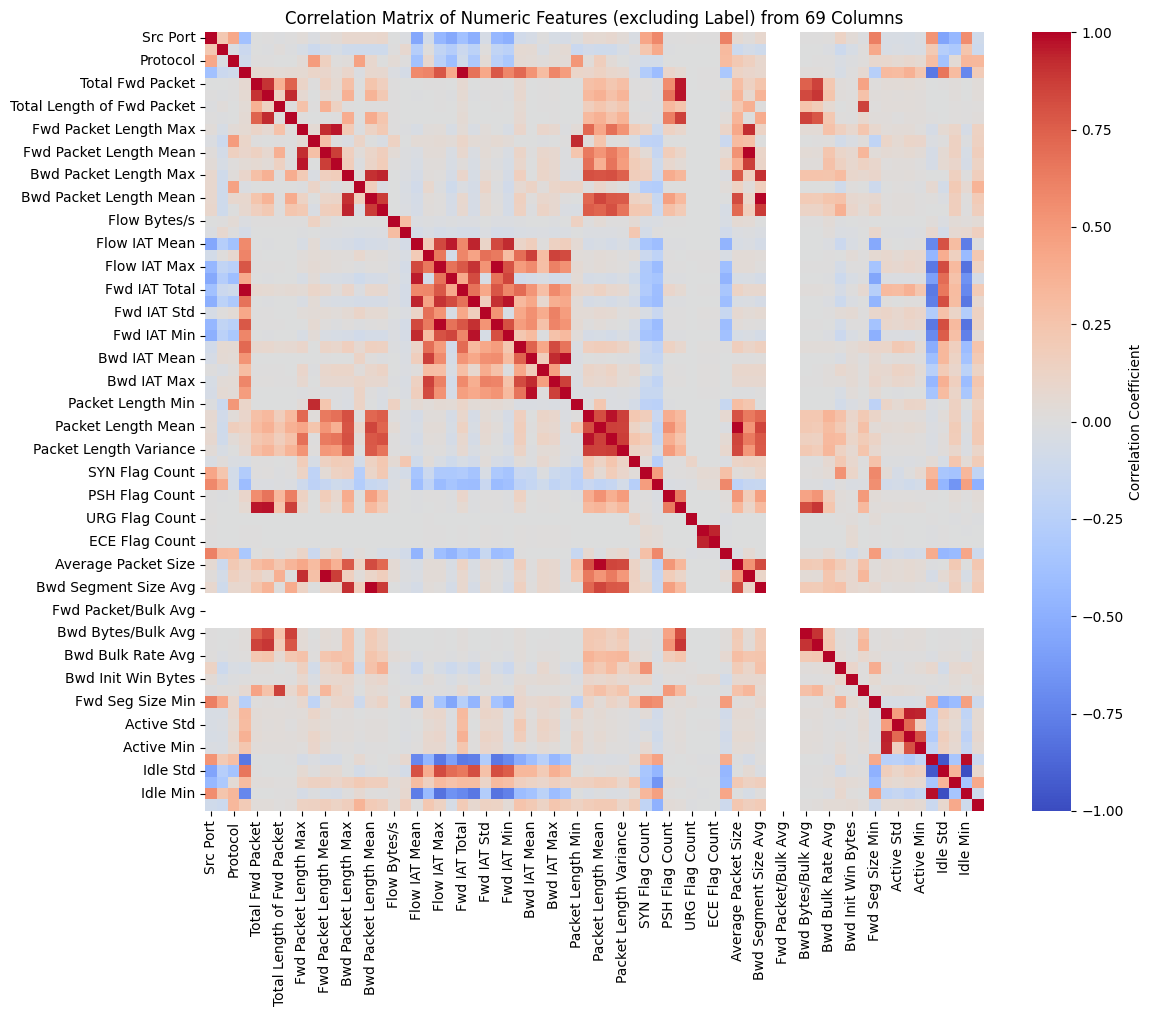

High correlation (0.997) between Flow Duration and Fwd IAT Total
High correlation (0.906) between Total Fwd Packet and Total Bwd packets
High correlation (0.964) between Total Fwd Packet and ACK Flag Count
High correlation (0.924) between Total Bwd packets and Total Length of Bwd Packet
High correlation (0.976) between Total Bwd packets and ACK Flag Count
High correlation (0.915) between Fwd Packet Length Max and Fwd Packet Length Mean
High correlation (0.968) between Fwd Packet Length Max and Fwd Packet Length Std
High correlation (0.915) between Fwd Packet Length Max and Fwd Segment Size Avg
High correlation (0.923) between Fwd Packet Length Min and Packet Length Min
High correlation (1.000) between Fwd Packet Length Mean and Fwd Segment Size Avg
High correlation (0.912) between Bwd Packet Length Max and Bwd Packet Length Mean
High correlation (0.942) between Bwd Packet Length Max and Bwd Packet Length Std
High correlation (0.912) between Bwd Packet Length Max and Bwd Segment Size Av

In [16]:
data = data.drop(columns=initial_columns_to_drop, errors="ignore")
print(f"Features after initial drop: {len(data.columns)}")  # Should be 69

# Compute correlation matrix (ignoring the Label column if present)
correlation_matrix = data.drop(columns=["Label"], errors="ignore").corr()

# Verify the shape of the correlation matrix
print(f"Correlation matrix shape: {correlation_matrix.shape}")  # Should be (67, 67)

# Visualize the correlation matrix as a heatmap with built-in colorbar
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    cbar_kws={"label": "Correlation Coefficient"},
)
plt.title("Correlation Matrix of Numeric Features (excluding Label) from 69 Columns")
plt.tight_layout()

# Save the plot as an image for Fig. 2
plt.savefig("correlation_matrix_69_numeric_features.png")
plt.show()

# Optional: Print highly correlated pairs (threshold 0.85)
correlation_threshold = 0.9
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
highly_correlated_pairs = np.where(upper_triangle > correlation_threshold)
for i, j in zip(*highly_correlated_pairs):
    if i < j:  # Avoid duplicates
        print(
            f"High correlation ({upper_triangle.iloc[i, j]:.3f}) between {upper_triangle.index[i]} and {upper_triangle.index[j]}"
        )

In [13]:
data = data.drop(columns=initial_columns_to_drop, errors="ignore")
print(f"Features after initial drop: {len(data.columns)}")  # Should be 69

# Select only numeric columns and drop 'Label' if present
numeric_data = data.select_dtypes(include=[np.number]).drop(
    columns=["Label"], errors="ignore"
)
print(f"Numeric features for correlation: {len(numeric_data.columns)}")  # Should be 67

# Compute correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Define correlation threshold
correlation_threshold = 0.85  # Adjust to 0.9 if preferred

# Extract the upper triangle of the correlation matrix to avoid duplicates
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Identify and print highly correlated pairs
highly_correlated_pairs = np.where(upper_triangle > correlation_threshold)
for i, j in zip(*highly_correlated_pairs):
    if i < j:  # Ensure we don't print the same pair twice
        correlation_value = upper_triangle.iloc[i, j]
        feature1 = upper_triangle.index[i]
        feature2 = upper_triangle.index[j]
        print(
            f"High correlation ({correlation_value:.3f}) between {feature1} and {feature2}"
        )


Features after initial drop: 69
Numeric features for correlation: 67
High correlation (0.997) between Flow Duration and Fwd IAT Total
High correlation (0.906) between Total Fwd Packet and Total Bwd packets
High correlation (0.964) between Total Fwd Packet and ACK Flag Count
High correlation (0.855) between Total Fwd Packet and Bwd Packet/Bulk Avg
High correlation (0.924) between Total Bwd packets and Total Length of Bwd Packet
High correlation (0.976) between Total Bwd packets and ACK Flag Count
High correlation (0.896) between Total Bwd packets and Bwd Packet/Bulk Avg
High correlation (0.859) between Total Length of Fwd Packet and Fwd Act Data Pkts
High correlation (0.865) between Total Length of Bwd Packet and ACK Flag Count
High correlation (0.856) between Total Length of Bwd Packet and Bwd Bytes/Bulk Avg
High correlation (0.915) between Fwd Packet Length Max and Fwd Packet Length Mean
High correlation (0.968) between Fwd Packet Length Max and Fwd Packet Length Std
High correlation 